# Data Modelling

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing data from a csv

In [2]:
pd.options.display.max_columns = None

In [3]:
df_loan = pd.read_csv('/content/drive/MyDrive/Python/loan_data_2007_2014.csv')
df_loan.head()

<ipython-input-3-12289ff8c657>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv('/content/drive/MyDrive/Python/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Cleaning Data

Changing variables types

In [5]:
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [6]:
df_loan['emp_length_int'] = df_loan['emp_length'].str.replace("\+ years", "")
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\< 1 year", str(0))
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace('n/a', str(0))
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ years", "")
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ year", "")

<ipython-input-6-4110cd9adc17>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length'].str.replace("\+ years", "")
<ipython-input-6-4110cd9adc17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\< 1 year", str(0))
<ipython-input-6-4110cd9adc17>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ years", "")
<ipython-input-6-4110cd9adc17>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ year", "")


In [7]:
df_loan['emp_length_int'].fillna(0, inplace=True)
df_loan['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0],
      dtype=object)

In [8]:
# Numbers still strings
df_loan['emp_length_int'] = pd.to_numeric(df_loan['emp_length_int'])
df_loan['emp_length_int'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [9]:
df_loan['emp_length_int'].dtypes

dtype('int64')

Variable 'Employment length in years' now is a integer number, going to another variable.

In [10]:
df_loan['earliest_cr_line'].unique() #should be a date variable

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [11]:
df_loan['earliest_cr_line_date'] = pd.to_datetime(df_loan['earliest_cr_line'], format='%b-%y')
df_loan['mths_since_earliest_cr_line'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['earliest_cr_line_date'] ) / np.timedelta64(1, 'M') ))
df_loan['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Somehow it returned a negative value.

In [12]:
df_loan.loc[ : , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][df_loan['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [13]:
df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] = df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] - pd.DateOffset(years=100)

<ipython-input-13-0a34ac2ec276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] = df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] - pd.DateOffset(years=100)


looking at the datframe with negatives values, you can see that the convertion to the date format went wrong. So I subtract 100 years on those negatives date and I will calculate it again.

In [14]:
df_loan['mths_since_earliest_cr_line'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['earliest_cr_line_date'] ) / np.timedelta64(1, 'M') ))
df_loan['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

Everything seems to look right. Going to do the same thing to the others variables we are going to use on the models.


In [15]:
df_loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
df_loan['term_int'] = df_loan['term'].str.replace(' ', '')
df_loan['term_int'] = df_loan['term_int'].str.replace('months', '')

In [17]:
df_loan['term_int'] = pd.to_numeric(df_loan['term_int'])

In [18]:
df_loan['term_int'].dtypes

dtype('int64')

Solved the term length issue. Replaced and converted to integer number.

In [19]:
df_loan['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [20]:
df_loan['issue_date'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y')
df_loan['mths_issue_date'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['issue_date'] ) / np.timedelta64(1, 'M') )) #Using a random data on then same year of this dataset was extracted
df_loan['mths_issue_date'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_issue_date, dtype: float64

In [21]:
df_loan['issue_date'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [22]:
df_loan['mths_issue_date'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

Transforming into binaries variables.

In [23]:
pd.get_dummies(df_loan['grade']).head()

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [24]:
pd.get_dummies(df_loan['grade'], prefix = 'grade', prefix_sep = ':').head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [25]:
loan_data_dummies = [pd.get_dummies(df_loan['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(df_loan['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(df_loan['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(df_loan['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(df_loan['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(df_loan['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(df_loan['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(df_loan['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [26]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [28]:
df_loan = pd.concat([df_loan, loan_data_dummies], axis = 1) #do a join on the dataframe

In [29]:
df_loan.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

Dealing with missing values.

In [30]:
df_loan.isnull()
pd.options.display.max_rows = None
df_loan.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [31]:
pd.options.display.max_rows = 100

In [32]:
df_loan['total_rev_hi_lim'].fillna(df_loan['funded_amnt'], inplace = True)

In [33]:
df_loan['total_rev_hi_lim'].isnull().sum()

0

Filling with the funded amount column was a sucess

In [34]:
df_loan['annual_inc'].fillna(df_loan['annual_inc'].mean(), inplace=True) # Filling with the mean value, but the rest i will fill with 0

In [35]:
df_loan['annual_inc'].isnull().sum()

0

In [36]:
df_loan['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df_loan['acc_now_delinq'].fillna(0, inplace=True)
df_loan['total_acc'].fillna(0, inplace=True)
df_loan['pub_rec'].fillna(0, inplace=True)
df_loan['open_acc'].fillna(0, inplace=True)
df_loan['inq_last_6mths'].fillna(0, inplace=True)
df_loan['delinq_2yrs'].fillna(0, inplace=True)
df_loan['emp_length_int'].fillna(0, inplace=True)

In [37]:
df_loan['emp_length_int'].isnull().sum()

0

# PD Model - Probability of Default

In [38]:
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [39]:
df_loan['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [40]:
df_loan['loan_status'].count()

466285

In [41]:
df_loan['loan_status'].value_counts() / df_loan['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [42]:
df_loan['good_bad'] = np.where(df_loan['loan_status'].isin(['Charged Off','Late (31-120 days)','Default']),  0,  1)

In [43]:
df_loan[['loan_status','good_bad']]

,loan_status,good_bad
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
...,...,...
466280,Current,1
466281,Charged Off,0
466282,Current,1
466283,Fully Paid,1


In [44]:
df_loan['good_bad'].sum()

416078

## Splitting Data

In [45]:
train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad']) #Taking this column out of the train data, this the target, so it cannot be used as a variable

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 139522      139522   5029035    6331356       5000         5000   
 459764      459764  10565458   12447537       6500         6500   
 267339      267339  32749662   35382828      20000        20000   
 99330        99330   6839203    8460915      20000        20000   
 57784        57784   8959339   10751248      12000        12000   
 ...            ...       ...        ...        ...          ...   
 425197      425197  10125838   11977944      12000        12000   
 240998      240998  27420352   29913428      11700        11700   
 41068        41068    428826     507746      25000        25000   
 233405      233405  37068480   39537194      19950        19950   
 53853        53853   9208826   11030726      35000        35000   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 139522       5000.00000   60 months     11.14       109.07     B        B2   
 459764       6450.00000

it returned 4 dataframes, so I will apply each to a specific dataframe

In [46]:
df_loan_train, df_loan_test, df_loan_train_target, df_loan_test_target  = train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad'])

In [47]:
df_loan_train, df_loan_test, df_loan_train_target, df_loan_test_target  = train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad'], test_size = 0.2, random_state = 42)

In [48]:
df_loan_train.shape

(373028, 207)

In [49]:
df_loan_test.shape

(93257, 207)

In [50]:
df_loan_train_target.shape

(373028,)

In [51]:
df_loan_test_target.shape

(93257,)

In [52]:
df_inputs = df_loan_train
df_targets = df_loan_train_target

In [53]:
df_inputs['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [54]:
df = pd.concat([df_inputs['grade'], df_targets], axis = 1)
df.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [55]:
df.columns.values[0]

'grade'

In [56]:
df.groupby(df.columns.values[0], as_index = False  )[df.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [57]:
df1  = pd.concat(
    [df.groupby(df.columns.values[0],  as_index = False)[df.columns.values[1]].count(),
    df.groupby(df.columns.values[0],  as_index = False)[df.columns.values[1]].mean()] , axis=1
)

df1.head()

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961161
1,B,109730,B,0.921589
2,C,100245,C,0.886947
3,D,61498,D,0.848987
4,E,28612,E,0.809940


In [58]:
df1 = df1.iloc[:,[0,1,3]]

In [59]:
df1.columns = [df1.columns.values[0] , 'n_obs' , 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.961161
1,B,109730,0.921589
2,C,100245,0.886947
3,D,61498,0.848987
4,E,28612,0.809940
5,F,10530,0.761159
6,G,2654,0.748681


In [60]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [61]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961161,0.160200
1,B,109730,0.921589,0.294160
2,C,100245,0.886947,0.268733
3,D,61498,0.848987,0.164862
4,E,28612,0.809940,0.076702
5,F,10530,0.761159,0.028228
6,G,2654,0.748681,0.007115


In [62]:
df1['n_good'] = df1.prop_good       * df1.n_obs
df1['n_bad']  = (1 - df1.prop_good) * df1.n_obs
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961161,0.160200,57438.0,2321.0
1,B,109730,0.921589,0.294160,101126.0,8604.0
2,C,100245,0.886947,0.268733,88912.0,11333.0
3,D,61498,0.848987,0.164862,52211.0,9287.0
4,E,28612,0.809940,0.076702,23174.0,5438.0
5,F,10530,0.761159,0.028228,8015.0,2515.0
6,G,2654,0.748681,0.007115,1987.0,667.0


In [63]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad']  = df1['n_bad']  / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961161,0.160200,57438.0,2321.0,0.172557,0.057787
1,B,109730,0.921589,0.294160,101126.0,8604.0,0.303807,0.214216
2,C,100245,0.886947,0.268733,88912.0,11333.0,0.267113,0.282161
3,D,61498,0.848987,0.164862,52211.0,9287.0,0.156854,0.231221
4,E,28612,0.809940,0.076702,23174.0,5438.0,0.069620,0.135392
5,F,10530,0.761159,0.028228,8015.0,2515.0,0.024079,0.062617
6,G,2654,0.748681,0.007115,1987.0,667.0,0.005969,0.016606


## Calculating the Weight of Evidence of this Categorical Variable

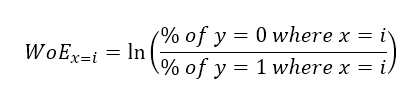

In [64]:
df1['WoE'] = np.log( df1.prop_n_good / df1.prop_n_bad )
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961161,0.160200,57438.0,2321.0,0.172557,0.057787,1.093973
1,B,109730,0.921589,0.294160,101126.0,8604.0,0.303807,0.214216,0.349405
2,C,100245,0.886947,0.268733,88912.0,11333.0,0.267113,0.282161,-0.054807
3,D,61498,0.848987,0.164862,52211.0,9287.0,0.156854,0.231221,-0.388057
4,E,28612,0.809940,0.076702,23174.0,5438.0,0.069620,0.135392,-0.665115
5,F,10530,0.761159,0.028228,8015.0,2515.0,0.024079,0.062617,-0.955693
6,G,2654,0.748681,0.007115,1987.0,667.0,0.005969,0.016606,-1.023144


In [65]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.748681,0.007115,1987.0,667.0,0.005969,0.016606,-1.023144
1,F,10530,0.761159,0.028228,8015.0,2515.0,0.024079,0.062617,-0.955693
2,E,28612,0.809940,0.076702,23174.0,5438.0,0.069620,0.135392,-0.665115
3,D,61498,0.848987,0.164862,52211.0,9287.0,0.156854,0.231221,-0.388057
4,C,100245,0.886947,0.268733,88912.0,11333.0,0.267113,0.282161,-0.054807
5,B,109730,0.921589,0.294160,101126.0,8604.0,0.303807,0.214216,0.349405
6,A,59759,0.961161,0.160200,57438.0,2321.0,0.172557,0.057787,1.093973


In [66]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.748681,0.007115,1987.0,667.0,0.005969,0.016606,-1.023144,NaN,NaN
1,F,10530,0.761159,0.028228,8015.0,2515.0,0.024079,0.062617,-0.955693,0.012477,0.067451
2,E,28612,0.809940,0.076702,23174.0,5438.0,0.069620,0.135392,-0.665115,0.048781,0.290578
3,D,61498,0.848987,0.164862,52211.0,9287.0,0.156854,0.231221,-0.388057,0.039047,0.277058
4,C,100245,0.886947,0.268733,88912.0,11333.0,0.267113,0.282161,-0.054807,0.037960,0.333251
5,B,109730,0.921589,0.294160,101126.0,8604.0,0.303807,0.214216,0.349405,0.034642,0.404212
6,A,59759,0.961161,0.160200,57438.0,2321.0,0.172557,0.057787,1.093973,0.039571,0.744568


## Calculating the Information Value (IV) of a Discrete Variable

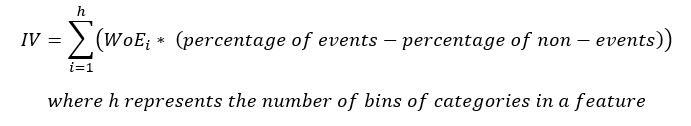

In [67]:
df1['IV'] = (df1.prop_n_good - df1.prop_n_bad) * df1.WoE
df1.IV = df1.IV.sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.748681,0.007115,1987.0,667.0,0.005969,0.016606,-1.023144,NaN,NaN,0.278002
1,F,10530,0.761159,0.028228,8015.0,2515.0,0.024079,0.062617,-0.955693,0.012477,0.067451,0.278002
2,E,28612,0.809940,0.076702,23174.0,5438.0,0.069620,0.135392,-0.665115,0.048781,0.290578,0.278002
3,D,61498,0.848987,0.164862,52211.0,9287.0,0.156854,0.231221,-0.388057,0.039047,0.277058,0.278002
4,C,100245,0.886947,0.268733,88912.0,11333.0,0.267113,0.282161,-0.054807,0.037960,0.333251,0.278002
5,B,109730,0.921589,0.294160,101126.0,8604.0,0.303807,0.214216,0.349405,0.034642,0.404212,0.278002
6,A,59759,0.961161,0.160200,57438.0,2321.0,0.172557,0.057787,1.093973,0.039571,0.744568,0.278002


Transforming the previous task into a function.

In [68]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [69]:
df_temp = woe_discrete(df_inputs, 'grade', df_targets)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.748681,0.007115,1987.0,667.0,0.005969,0.016606,-1.023144,NaN,NaN,0.278002
1,F,10530,0.761159,0.028228,8015.0,2515.0,0.024079,0.062617,-0.955693,0.012477,0.067451,0.278002
2,E,28612,0.809940,0.076702,23174.0,5438.0,0.069620,0.135392,-0.665115,0.048781,0.290578,0.278002
3,D,61498,0.848987,0.164862,52211.0,9287.0,0.156854,0.231221,-0.388057,0.039047,0.277058,0.278002
4,C,100245,0.886947,0.268733,88912.0,11333.0,0.267113,0.282161,-0.054807,0.037960,0.333251,0.278002
5,B,109730,0.921589,0.294160,101126.0,8604.0,0.303807,0.214216,0.349405,0.034642,0.404212,0.278002
6,A,59759,0.961161,0.160200,57438.0,2321.0,0.172557,0.057787,1.093973,0.039571,0.744568,0.278002


## Visualizing the Results

In [81]:
def plot_by_woe(df_WoE, rotation_of_x = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE.WoE
    plt.figure(figsize=(20,5))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(f'Weight of Evidence by {str(df_WoE.columns[0])}')
    plt.xticks(rotation = rotation_of_x)


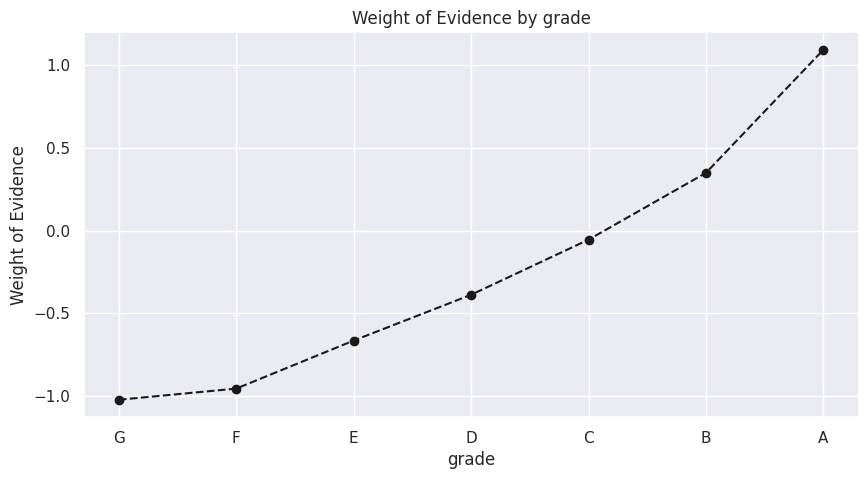

In [71]:
plot_by_woe(df_temp)

Transforming other variables and visualizing it

In [72]:
df_temp = woe_discrete(df_inputs, 'home_ownership' ,df_targets)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000149,-0.380134,NaN,NaN,inf
1,OTHER,137,0.854015,0.000367,117.0,20.0,0.000351,0.000498,-0.348293,0.004015,0.031841,inf
2,RENT,150599,0.875776,0.403720,131891.0,18708.0,0.396232,0.465779,-0.161710,0.021761,0.186583,inf
3,OWN,33295,0.893798,0.089256,29759.0,3536.0,0.089403,0.088037,0.015400,0.018022,0.177111,inf
4,MORTGAGE,188956,0.905295,0.506546,171061.0,17895.0,0.513908,0.445537,0.142764,0.011498,0.127363,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.094705,inf,inf


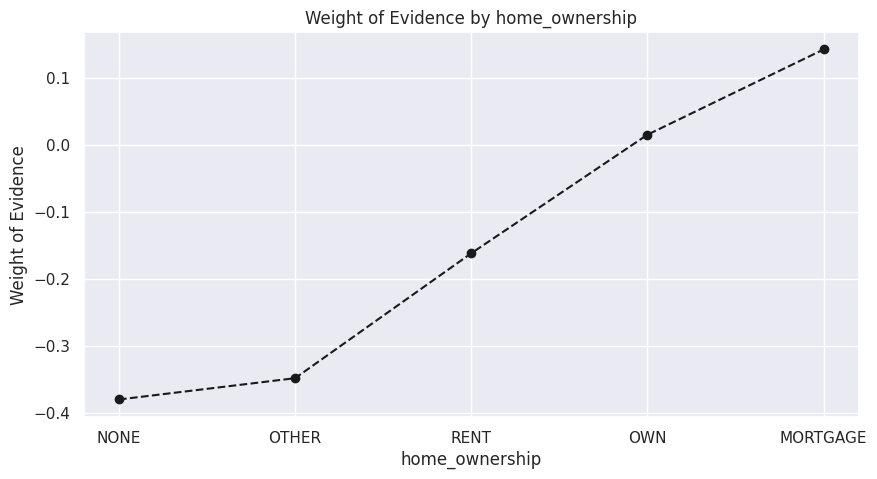

In [73]:
plot_by_woe(df_temp)

In [74]:
df_inputs['home_ownership:RENT_OTHER_NONE_ANY'] = sum( [df_inputs['home_ownership:RENT'],df_inputs['home_ownership:OTHER'], df_inputs['home_ownership:NONE'], df_inputs['home_ownership:ANY']] )

Adding the 4 categories together.

In [75]:
df_inputs['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [78]:
df_inputs['addr_state'].value_counts()

CA    57199
NY    32211
TX    29158
FL    25211
IL    14833
NJ    14385
PA    13090
OH    12135
GA    11960
VA    11366
NC    10204
MI     9191
MA     8858
MD     8771
AZ     8645
WA     8372
CO     7823
MN     6526
MO     6017
CT     5775
NV     5221
IN     5210
TN     4845
OR     4814
WI     4740
AL     4671
SC     4448
LA     4359
KY     3587
KS     3360
OK     3284
AR     2760
UT     2756
NM     2075
HI     2001
WV     1926
NH     1830
RI     1647
DC     1129
MT     1103
DE     1064
AK     1003
MS      980
WY      919
SD      801
VT      727
IA       13
NE       13
ID       10
ME        2
Name: addr_state, dtype: int64

No obsevations for the state ND.

In [87]:
if ['addr_state:ND'] in df_inputs.columns.values:
    pass
else:
    df_inputs['addr_state:ND'] = 0

In [79]:
df_temp = woe_discrete(df_inputs,'addr_state',df_targets)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.692308,0.000035,9.0,4.0,0.000027,0.000100,-1.303805,NaN,NaN,inf
1,NV,5221,0.867075,0.013996,4527.0,694.0,0.013600,0.017279,-0.239392,0.174768,1.064413,inf
2,FL,25211,0.878029,0.067585,22136.0,3075.0,0.066502,0.076559,-0.140835,0.010954,0.098558,inf
3,HI,2001,0.878061,0.005364,1757.0,244.0,0.005278,0.006075,-0.140540,0.000032,0.000295,inf
4,AL,4671,0.878399,0.012522,4103.0,568.0,0.012326,0.014142,-0.137383,0.000338,0.003157,inf
5,NM,2075,0.884819,0.005563,1836.0,239.0,0.005516,0.005950,-0.075854,0.006421,0.061529,inf
6,VA,11366,0.884920,0.030470,10058.0,1308.0,0.030217,0.032566,-0.074866,0.000101,0.000988,inf
7,OK,3284,0.885201,0.008804,2907.0,377.0,0.008733,0.009386,-0.072103,0.000281,0.002763,inf
8,TN,4845,0.885449,0.012988,4290.0,555.0,0.012888,0.013818,-0.069661,0.000248,0.002442,inf
9,NY,32211,0.885536,0.086350,28524.0,3687.0,0.085693,0.091796,-0.068802,0.000087,0.000859,inf


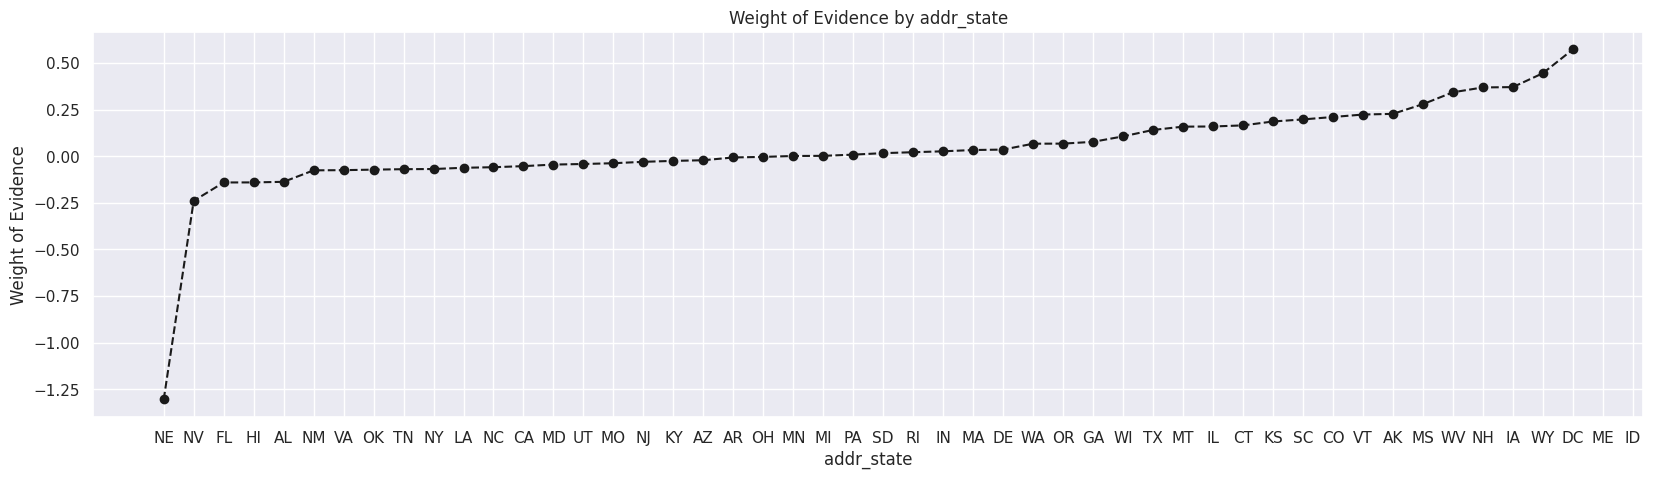

In [82]:
plot_by_woe(df_temp)

Taking the first two and the last one out of the graphic because they have a few observations. Grouping in other variables, besides IA has a better WoE, I am grouping with the lowest ones, beacause they are high risk variable as we don't have enough observations to predict.

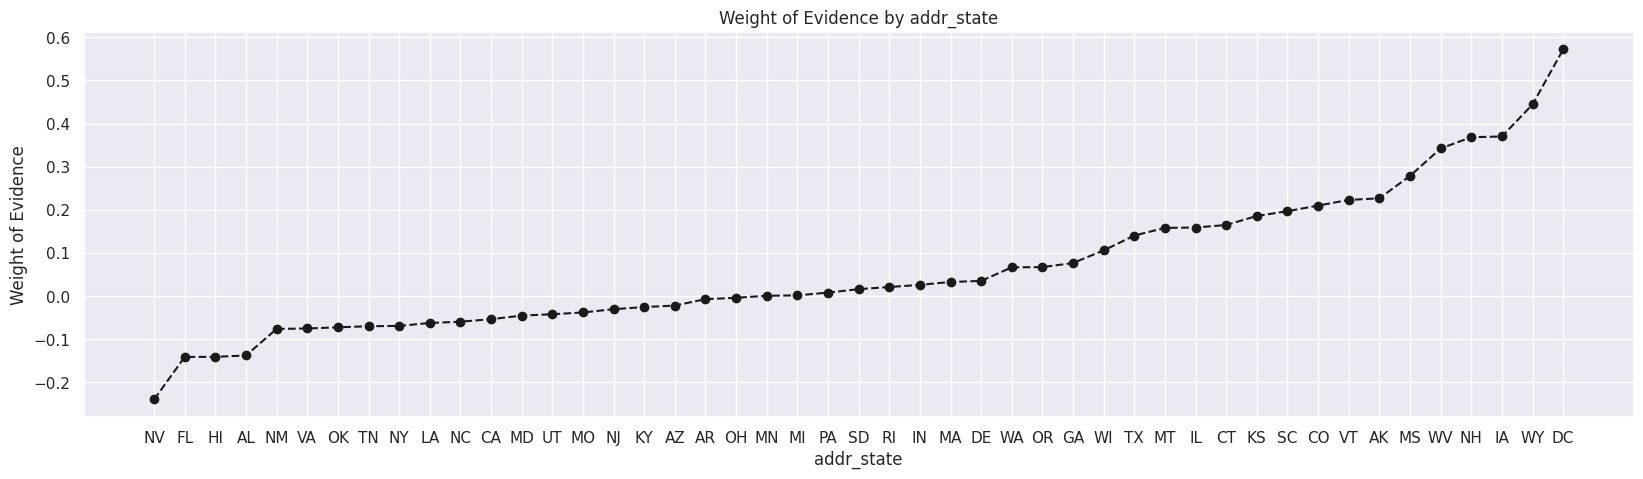

In [85]:
plot_by_woe(df_temp.iloc[1:-2,:])

In [89]:
df_inputs['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs['addr_state:ND'], df_inputs['addr_state:NE'],
                                                         df_inputs['addr_state:IA'], df_inputs['addr_state:NV'],
                                                         df_inputs['addr_state:FL'], df_inputs['addr_state:HI'],
                                                         df_inputs['addr_state:AL']])


df_inputs['addr_state:NM_VA'] = sum([df_inputs['addr_state:NM'], df_inputs['addr_state:VA']])


df_inputs['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs['addr_state:OK'], df_inputs['addr_state:TN'],
                                              df_inputs['addr_state:MO'], df_inputs['addr_state:LA'],
                                              df_inputs['addr_state:MD'], df_inputs['addr_state:NC']])

# No including CA, they have already a particular number of observations, I did the same with NY and TX


df_inputs['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs['addr_state:UT'], df_inputs['addr_state:KY'],
                                              df_inputs['addr_state:AZ'], df_inputs['addr_state:NJ']])


df_inputs['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs['addr_state:AR'], df_inputs['addr_state:MI'],
                                              df_inputs['addr_state:PA'], df_inputs['addr_state:OH'],
                                              df_inputs['addr_state:MN']])


df_inputs['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs['addr_state:RI'], df_inputs['addr_state:MA'],
                                              df_inputs['addr_state:DE'], df_inputs['addr_state:SD'],
                                              df_inputs['addr_state:IN']])


df_inputs['addr_state:GA_WA_OR'] = sum([df_inputs['addr_state:GA'], df_inputs['addr_state:WA'],
                                              df_inputs['addr_state:OR']])



df_inputs['addr_state:WI_MT'] = sum([df_inputs['addr_state:WI'], df_inputs['addr_state:MT']])



df_inputs['addr_state:IL_CT'] = sum([df_inputs['addr_state:IL'], df_inputs['addr_state:CT']])



df_inputs['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs['addr_state:KS'], df_inputs['addr_state:SC'],
                                              df_inputs['addr_state:CO'], df_inputs['addr_state:VT'],
                                              df_inputs['addr_state:AK'], df_inputs['addr_state:MS']])


df_inputs['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs['addr_state:WV'], df_inputs['addr_state:NH'],
                                              df_inputs['addr_state:WY'], df_inputs['addr_state:DC'],
                                              df_inputs['addr_state:ME'], df_inputs['addr_state:ID']])

In [90]:
df_inputs['verification_status'].value_counts()

Verified           134414
Source Verified    120030
Not Verified       118584
Name: verification_status, dtype: int64

In [91]:
df_temp = woe_discrete(df_inputs,'verification_status', df_targets)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.873696,0.360332,117437.0,16977.0,0.352809,0.422681,-0.180692,NaN,NaN,0.023848
1,Source Verified,120030,0.896484,0.321772,107605.0,12425.0,0.323271,0.309349,0.044022,0.022788,0.224714,0.023848
2,Not Verified,118584,0.909237,0.317896,107821.0,10763.0,0.323920,0.267970,0.189623,0.012753,0.145602,0.023848


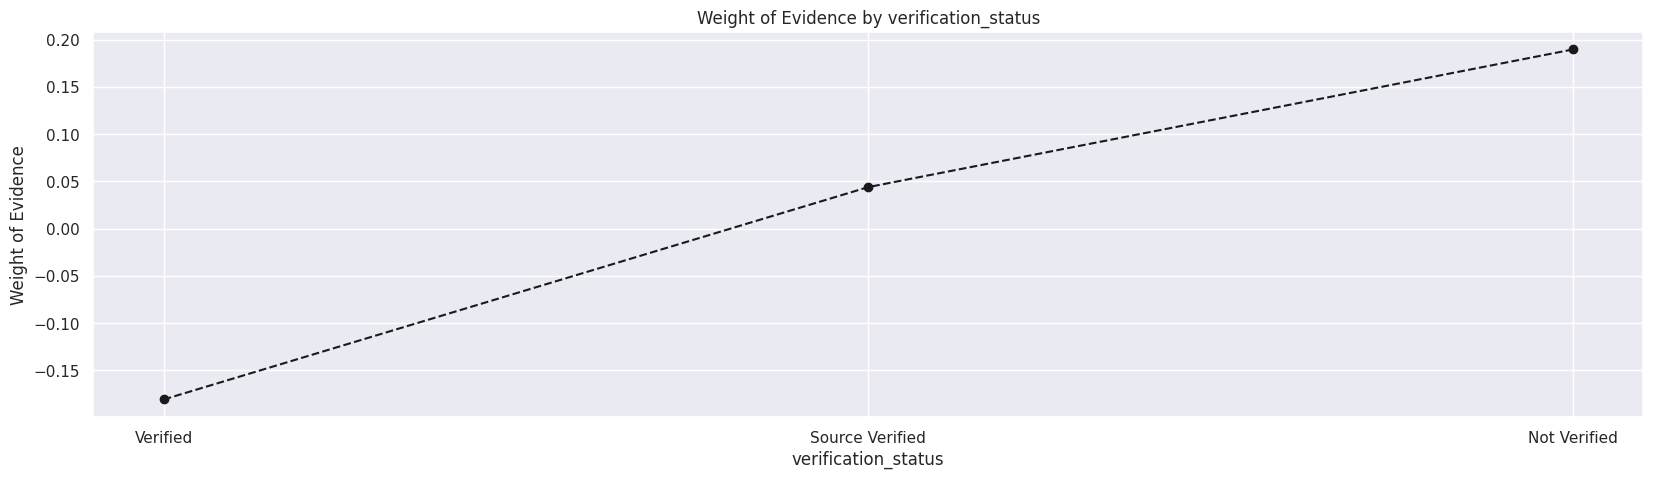

In [92]:
plot_by_woe(df_temp)

In [93]:
df_inputs['purpose'].value_counts()

debt_consolidation    219183
credit_card            83581
home_improvement       21238
other                  18884
major_purchase          7837
small_business          5582
car                     4325
medical                 3684
moving                  2392
vacation                1991
wedding                 1887
house                   1830
educational              333
renewable_energy         281
Name: purpose, dtype: int64

In [94]:
df_temp = woe_discrete(df_inputs, 'purpose', df_targets)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.795951,0.014964,4443.0,1139.0,0.013348,0.028358,-0.753556,NaN,NaN,0.031964
1,moving,2392,0.845736,0.006412,2023.0,369.0,0.006078,0.009187,-0.413195,0.049785,0.340361,0.031964
2,house,1830,0.865574,0.004906,1584.0,246.0,0.004759,0.006125,-0.252358,0.019838,0.160837,0.031964
3,other,18884,0.867348,0.050624,16379.0,2505.0,0.049206,0.062368,-0.237024,0.001774,0.015334,0.031964
4,renewable_energy,281,0.868327,0.000753,244.0,37.0,0.000733,0.000921,-0.228485,0.000979,0.008539,0.031964
5,medical,3684,0.872693,0.009876,3215.0,469.0,0.009659,0.011677,-0.189755,0.004365,0.038730,0.031964
6,educational,333,0.873874,0.000893,291.0,42.0,0.000874,0.001046,-0.179081,0.001181,0.010674,0.031964
7,vacation,1991,0.884982,0.005337,1762.0,229.0,0.005293,0.005701,-0.074252,0.011109,0.104829,0.031964
8,wedding,1887,0.887652,0.005059,1675.0,212.0,0.005032,0.005278,-0.047753,0.002670,0.026499,0.031964
9,debt_consolidation,219183,0.887975,0.587578,194629.0,24554.0,0.584712,0.611328,-0.044515,0.000323,0.003238,0.031964


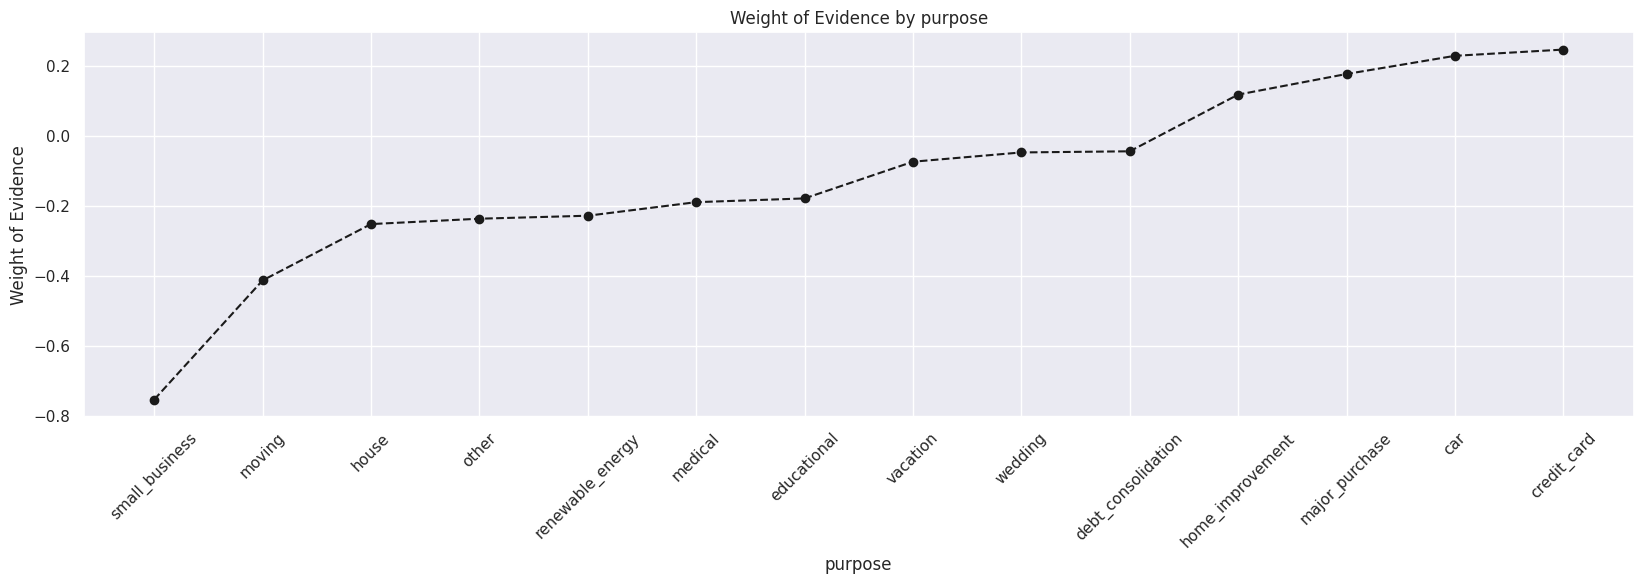

In [96]:
plot_by_woe(df_temp, 45)

In [97]:
df_inputs['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs['purpose:educational'], df_inputs['purpose:small_business'],
                                                                 df_inputs['purpose:wedding'], df_inputs['purpose:renewable_energy'],
                                                                 df_inputs['purpose:moving'], df_inputs['purpose:house']])
df_inputs['purpose:oth__med__vacation'] = sum([df_inputs['purpose:other'], df_inputs['purpose:medical'],
                                             df_inputs['purpose:vacation']])
df_inputs['purpose:major_purch__car__home_impr'] = sum([df_inputs['purpose:major_purchase'], df_inputs['purpose:car'],
                                                        df_inputs['purpose:home_improvement']])

In [98]:
df_inputs['initial_list_status'].value_counts()

f    242514
w    130514
Name: initial_list_status, dtype: int64

In [100]:
df_temp = woe_discrete(df_inputs , 'initial_list_status', df_targets)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.882221,0.650123,213951.0,28563.0,0.64276,0.711142,-0.101100,NaN,NaN,0.021443
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.35724,0.288858,0.212471,0.028884,0.313571,0.021443


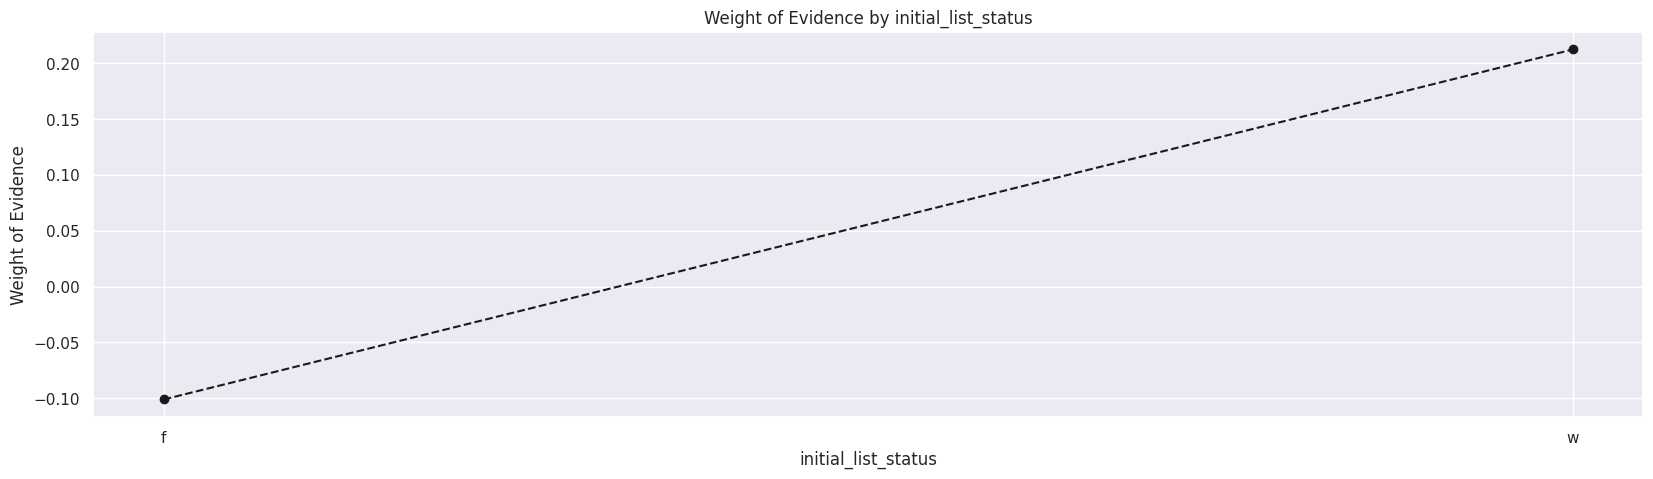

In [101]:
plot_by_woe(df_temp)

## Calculating the Weight of Evidence and Information Value for the continuous Variables

In [134]:
def woe_continuous(df, continuous_variable_name, good_bad_variable_df):
    df = pd.concat([df[continuous_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [104]:
df_inputs['term_int'].unique()

array([36, 60])

In [106]:
df_temp = woe_continuous(df_inputs, 'term_int', df_targets)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.904914,0.724929,244706.0,25713.0,0.735155,0.640184,0.138326,NaN,NaN,0.042241
1,60,102609,0.859155,0.275071,88157.0,14452.0,0.264845,0.359816,-0.306449,0.04576,0.444774,0.042241


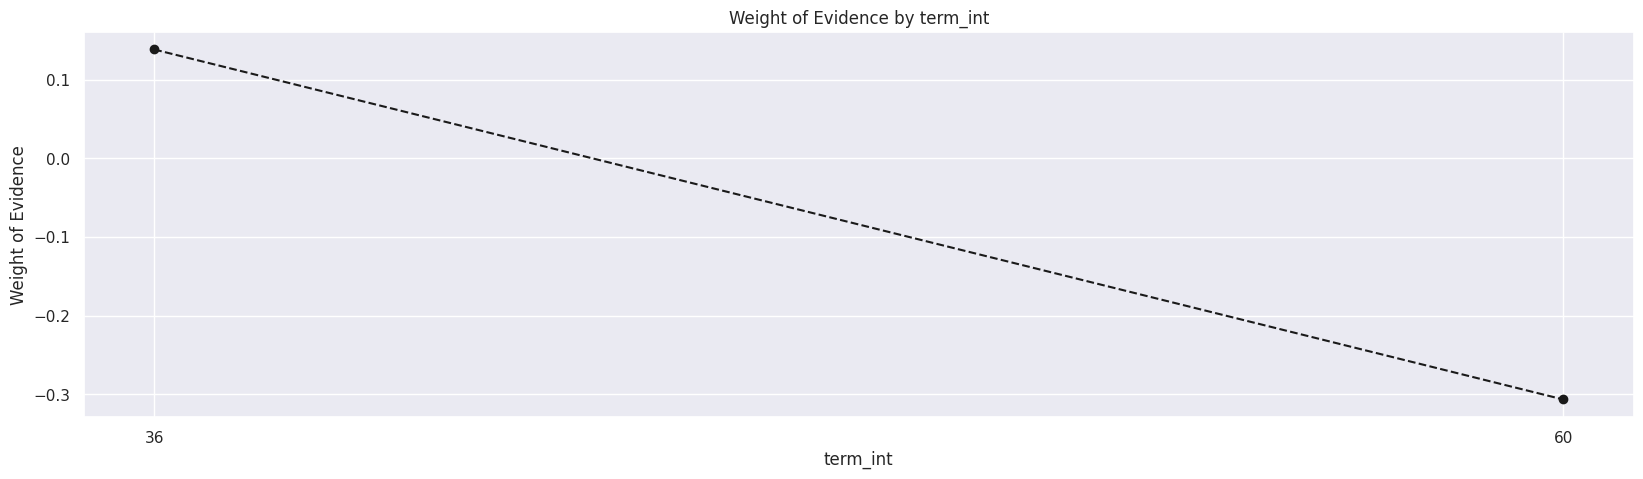

In [107]:
plot_by_woe(df_temp)

In [110]:
df_inputs['term:36'] = np.where( ( df_inputs['term_int']==36 ) , 1, 0)
df_inputs['term:60'] = np.where( ( df_inputs['term_int']==60 ) , 1, 0)

In [111]:
df_inputs['emp_length_int'].unique()

array([ 3,  6, 10,  7,  5,  0,  2,  9,  1,  8,  4])

In [112]:
df_temp = woe_continuous(df_inputs, 'emp_length_int', df_targets)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,45720,0.878696,0.122565,40174.0,5546.0,0.120692,0.138080,-0.134592,NaN,NaN,0.006057
1,1,23654,0.889955,0.063411,21051.0,2603.0,0.063242,0.064808,-0.024452,0.011259,0.110140,0.006057
2,2,33078,0.893101,0.088674,29542.0,3536.0,0.088751,0.088037,0.008082,0.003146,0.032533,0.006057
3,3,29205,0.892792,0.078292,26074.0,3131.0,0.078333,0.077953,0.004851,0.000309,0.003231,0.006057
4,4,22468,0.892647,0.060231,20056.0,2412.0,0.060253,0.060052,0.003337,0.000145,0.001514,0.006057
5,5,24602,0.886269,0.065952,21804.0,2798.0,0.065504,0.069663,-0.061546,0.006378,0.064884,0.006057
6,6,20887,0.885383,0.055993,18493.0,2394.0,0.055557,0.059604,-0.070308,0.000886,0.008762,0.006057
7,7,21049,0.888736,0.056427,18707.0,2342.0,0.056200,0.058309,-0.036843,0.003353,0.033466,0.006057
8,8,17853,0.891335,0.047860,15913.0,1940.0,0.047806,0.048301,-0.010287,0.002599,0.026556,0.006057
9,9,14267,0.887713,0.038246,12665.0,1602.0,0.038049,0.039885,-0.047146,0.003622,0.036859,0.006057


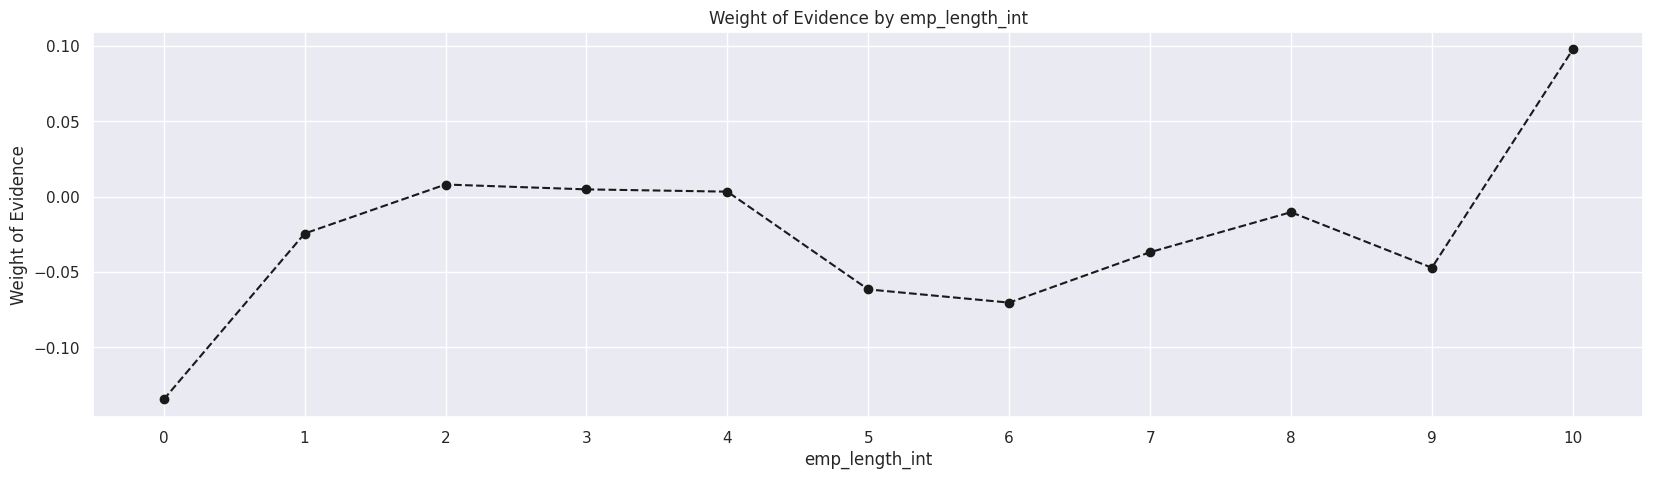

In [113]:
plot_by_woe(df_temp)

In [114]:
df_inputs['emp_length:0'] = np.where( df_inputs['emp_length_int']==0 , 1 ,0 )
df_inputs['emp_length:1'] = np.where( df_inputs['emp_length_int']==1 , 1 ,0 )
df_inputs['emp_length:2,3,4'] = np.where( df_inputs['emp_length_int'].isin([2,3,4]) , 1 ,0 )
df_inputs['emp_length:5,6'] = np.where( df_inputs['emp_length_int'].isin([5,6]) , 1 ,0 )
df_inputs['emp_length:7,8,9'] = np.where( df_inputs['emp_length_int'].isin([7,8,9]) , 1 ,0 )
df_inputs['emp_length:10'] = np.where( df_inputs['emp_length_int']==10 , 1 ,0 )

In [115]:
df_inputs['mths_issue_date'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

In [117]:
df_inputs['mths_since_issue_d_factor'] = pd.cut(df_inputs['mths_issue_date'], 50)
df_temp = woe_continuous(df_inputs , 'mths_since_issue_d_factor', df_targets)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079742,0.040508,0.677293,NaN,NaN,inf
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110553,0.070634,0.447988,0.013820,0.229305,inf
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106410,0.079522,0.291268,0.011140,0.156721,inf
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079264,0.066077,0.181955,0.008681,0.109313,inf
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076851,0.069364,0.102508,0.006815,0.079447,inf
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032866,0.030499,0.074750,0.002486,0.027758,inf
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066030,0.061546,0.070325,0.000401,0.004425,inf
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061298,0.063862,-0.040963,0.010572,0.111287,inf
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054599,0.061397,-0.117340,0.007804,0.076378,inf
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047689,0.060700,-0.241231,0.013660,0.123890,inf


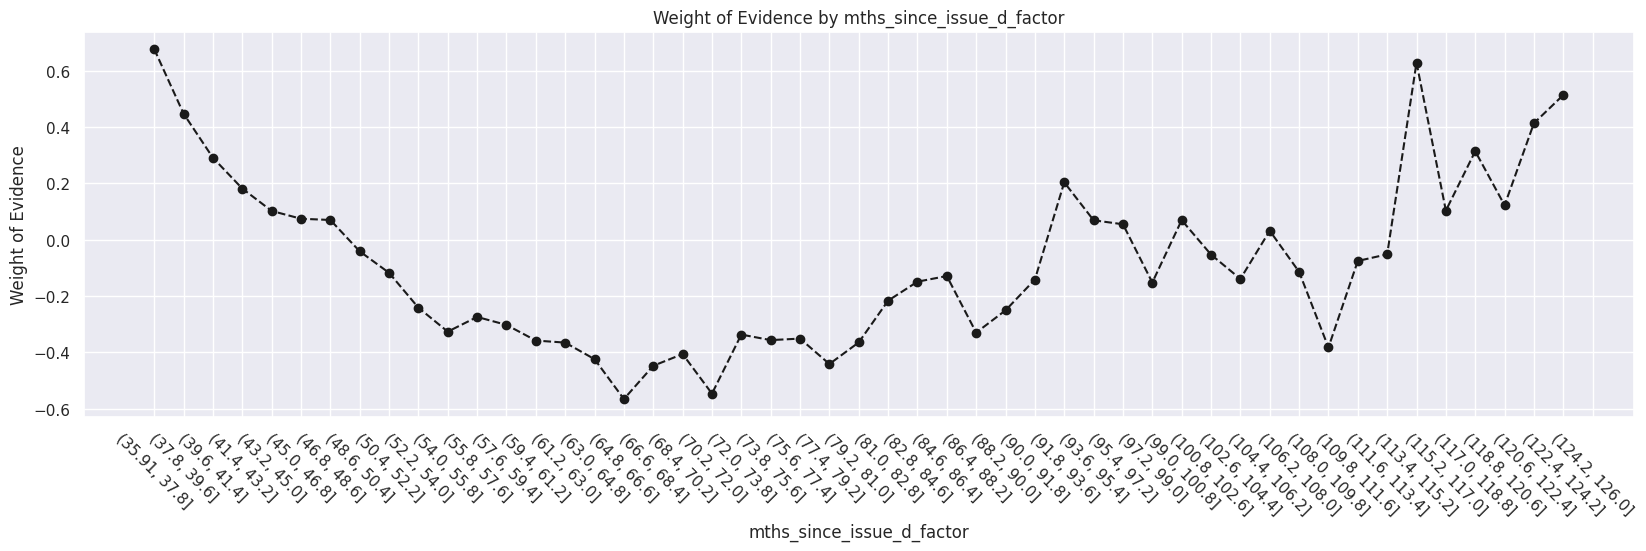

In [120]:
plot_by_woe(df_temp,-45)

In [124]:
df_inputs['mths_since_issue_d:<38'] = np.where(df_inputs['mths_issue_date'].isin(range(38)), 1, 0)

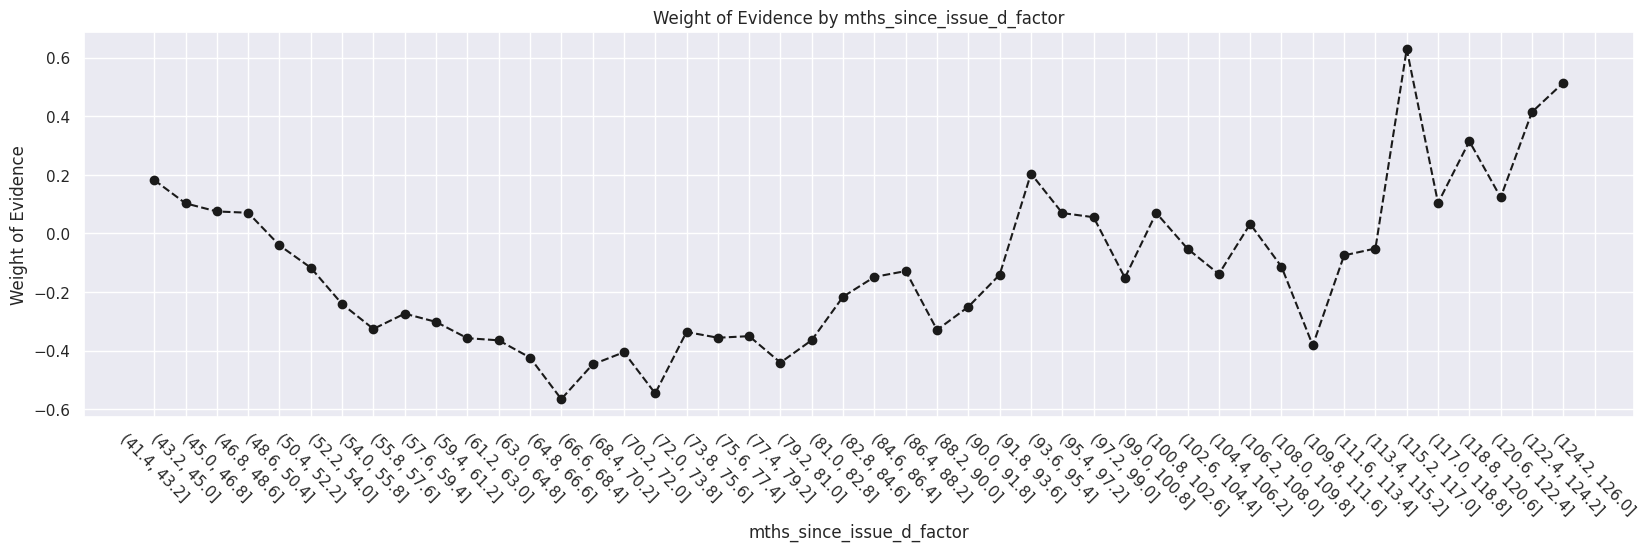

In [121]:
plot_by_woe(df_temp.iloc[3: , :],-45)

In [126]:
df_inputs['mths_since_issue_d:38-39'] = np.where(df_inputs['mths_issue_date'].isin(range(38, 40)), 1, 0)
df_inputs['mths_since_issue_d:40-41'] = np.where(df_inputs['mths_issue_date'].isin(range(40, 42)), 1, 0)
df_inputs['mths_since_issue_d:42-48'] = np.where(df_inputs['mths_issue_date'].isin(range(42, 49)), 1, 0)
df_inputs['mths_since_issue_d:49-52'] = np.where(df_inputs['mths_issue_date'].isin(range(49, 53)), 1, 0)
df_inputs['mths_since_issue_d:53-64'] = np.where(df_inputs['mths_issue_date'].isin(range(53, 65)), 1, 0)
df_inputs['mths_since_issue_d:65-84'] = np.where(df_inputs['mths_issue_date'].isin(range(65, 85)), 1, 0)
df_inputs['mths_since_issue_d:>84'] = np.where(df_inputs['mths_issue_date'].isin(range(85, int(df_inputs['mths_issue_date'].max()))), 1, 0)

In [129]:
df_inputs['int_rate_factor'] = pd.cut( df_inputs['int_rate'] , 50 )
df_temp = woe_continuous(df_inputs, 'int_rate_factor', df_targets)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002268,0.000747,1.110785,NaN,NaN,0.34526
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024914,0.004133,1.796444,0.018592,0.685659,0.34526
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022841,0.005552,1.414391,0.008871,0.382053,0.34526
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005308,0.001220,1.470483,0.001512,0.056092,0.34526
4,"(7.071, 7.484]",3143,0.976774,0.008426,3070.0,73.0,0.009223,0.001818,1.624238,0.003756,0.153755,0.34526
5,"(7.484, 7.897]",12581,0.962483,0.033727,12109.0,472.0,0.036378,0.011752,1.129990,0.014291,0.494248,0.34526
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027627,0.012225,0.815345,0.013170,0.314646,0.34526
7,"(8.31, 8.722]",6594,0.965726,0.017677,6368.0,226.0,0.019131,0.005627,1.223771,0.016413,0.408426,0.34526
8,"(8.722, 9.135]",9539,0.937729,0.025572,8945.0,594.0,0.026873,0.014789,0.597236,0.027997,0.626535,0.34526
9,"(9.135, 9.548]",6681,0.964975,0.017910,6447.0,234.0,0.019368,0.005826,1.201314,0.027246,0.604078,0.34526


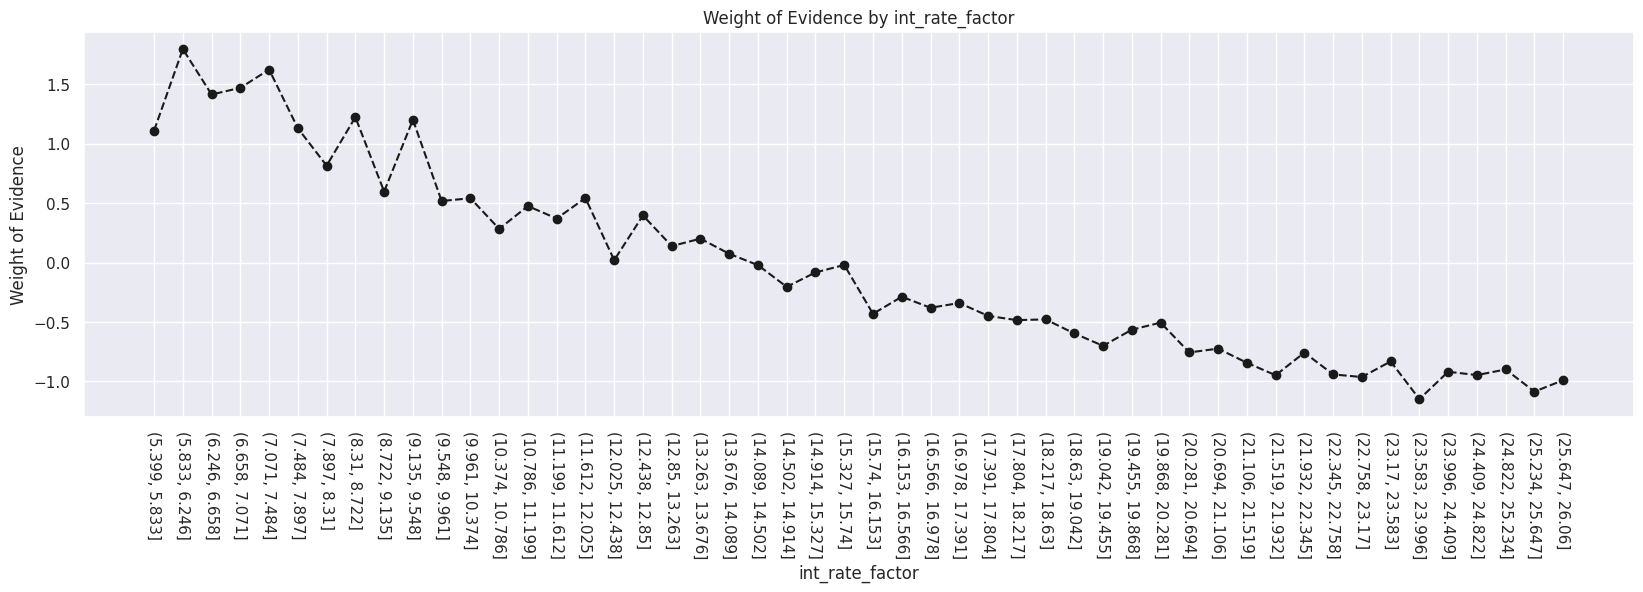

In [131]:
plot_by_woe(df_temp, -90)

In [132]:
df_inputs['int_rate:<9.548'] = np.where((df_inputs['int_rate'] <= 9.548), 1, 0)
df_inputs['int_rate:9.548-12.025'] = np.where((df_inputs['int_rate'] > 9.548) & (df_inputs['int_rate'] <= 12.025), 1, 0)
df_inputs['int_rate:12.025-15.74'] = np.where((df_inputs['int_rate'] > 12.025) & (df_inputs['int_rate'] <= 15.74), 1, 0)
df_inputs['int_rate:15.74-20.281'] = np.where((df_inputs['int_rate'] > 15.74) & (df_inputs['int_rate'] <= 20.281), 1, 0)
df_inputs['int_rate:>20.281'] = np.where((df_inputs['int_rate'] > 20.281), 1, 0)

In [135]:
df_inputs['funded_amnt_factor'] = pd.cut(df_inputs['funded_amnt'], 50)
df_temp = woe_continuous(df_inputs, 'funded_amnt_factor', df_targets)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.915033,0.003281,1120.0,104.0,0.003365,0.002589,0.261958,NaN,NaN,0.015564
1,"(1190.0, 1880.0]",3028,0.910502,0.008117,2757.0,271.0,0.008283,0.006747,0.205045,0.004531,0.056913,0.015564
2,"(1880.0, 2570.0]",6018,0.900133,0.016133,5417.0,601.0,0.016274,0.014963,0.083967,0.010369,0.121077,0.015564
3,"(2570.0, 3260.0]",7248,0.893212,0.019430,6474.0,774.0,0.019449,0.019271,0.009243,0.006921,0.074725,0.015564
4,"(3260.0, 3950.0]",4751,0.894969,0.012736,4252.0,499.0,0.012774,0.012424,0.027804,0.001758,0.018561,0.015564
5,"(3950.0, 4640.0]",9023,0.894049,0.024189,8067.0,956.0,0.024235,0.023802,0.018044,0.000921,0.009760,0.015564
6,"(4640.0, 5330.0]",15903,0.896246,0.042632,14253.0,1650.0,0.042819,0.041081,0.041457,0.002197,0.023413,0.015564
7,"(5330.0, 6020.0]",17236,0.908447,0.046206,15658.0,1578.0,0.047040,0.039288,0.180089,0.012201,0.138632,0.015564
8,"(6020.0, 6710.0]",6914,0.889789,0.018535,6152.0,762.0,0.018482,0.018972,-0.026149,0.018659,0.206238,0.015564
9,"(6710.0, 7400.0]",11806,0.900220,0.031649,10628.0,1178.0,0.031929,0.029329,0.084939,0.010431,0.111088,0.015564


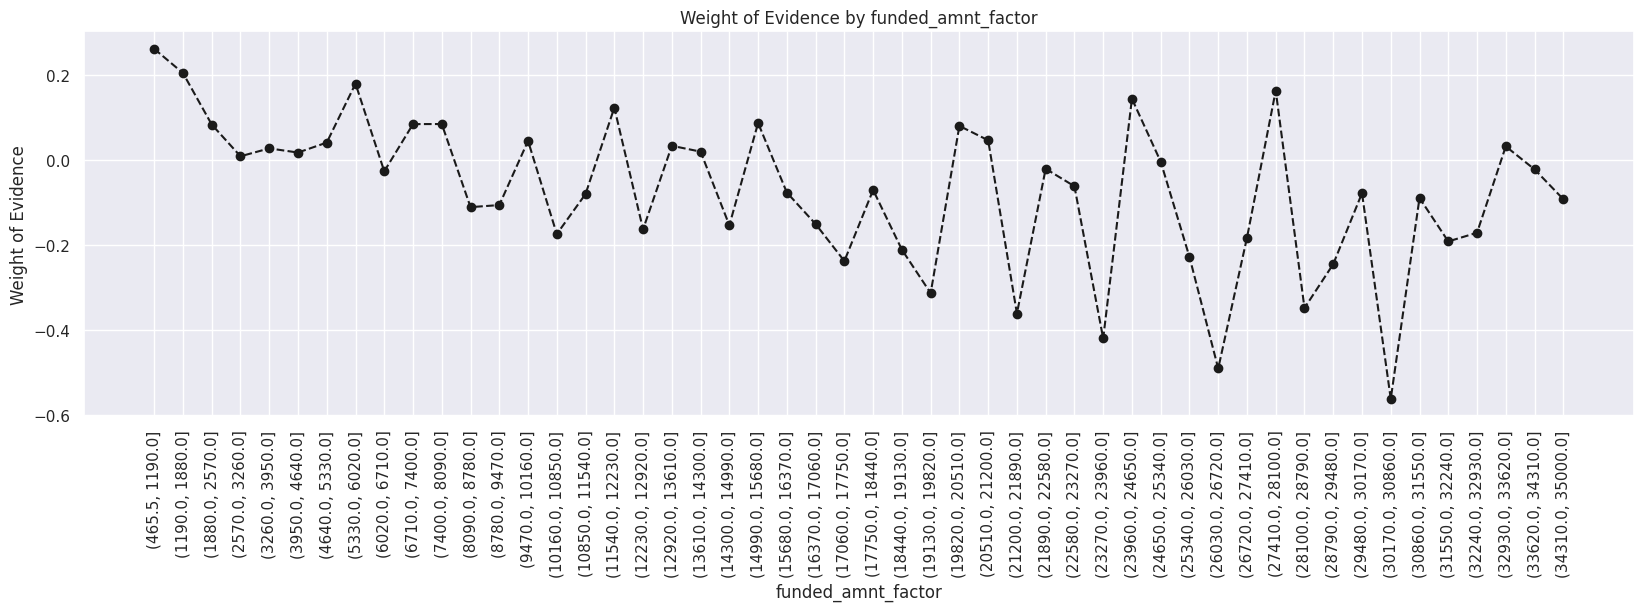

In [137]:
plot_by_woe(df_temp, 90)

The graph looks horizontal, so this variable will not be used.